In [1]:
import sys
sys.path.insert(0, '/Users/gulugulu/repos/PuningAnalysis/src')
from simulation.waiting_time_simulator import generate_ancestor, average_substitution, get_descrip_stat, simulate_seq
from cogent3.maths.matrix_exponential_integration import expected_number_subs
import numpy as np

In [2]:
#parameter set up
import json
with open('../../../data/dataset1_16s-10_initial_alignments/matrix_motif.json', 'r') as file:
    matrix_motif = json.load(file)

In [3]:
Q = {'0': np.array(matrix_motif['0']['matrix']['200580'])}
pi_0 = matrix_motif['0']['motif_prob']
repeats = 50
markov_order = 0
length = 3000
time_range = [0.5, 1, 2, 3, 4]
ances_seq = generate_ancestor(length, pi_0) 


In [4]:
# # Dictionary to store results
# results = {}

# # Loop over each sequence length and time to perform simulations
# for t in time_range:
#     print(t)
#     length = 3000
#     ns_per_site_list, avg_ns_per_site = average_substitution(Q, t, ances_seq, repeats, markov_order)
#     # Store the results
#     results[f"Length {length}, Time {t}"] = {
#         'avg_ns_per_site': avg_ns_per_site,
#         'ns_per_site_list': ns_per_site_list
#     }

# with open('../../../results/length_3000.json', 'w') as outfile:
#     json.dump(results, outfile, indent=4)

In [50]:
with open('../../../results/length_3000.json', 'r') as file1:
    results_3000 = json.load(file1)

with open('../../../results/length_1000.json', 'r') as file2:
    results_1000 = json.load(file2)

with open('../../../results/length_2000.json', 'r') as file3:
    results_2000 = json.load(file3)

with open('../../../results/length_4000.json', 'r') as file4:
    results_4000 = json.load(file4)

In [51]:
results_1000_new = {t: value for t, value in zip(time_range, results_1000.values())}
results_2000_new = {t: value for t, value in zip(time_range, results_2000.values())}
results_3000_new = {t: value for t, value in zip(time_range, results_3000.values())}
results_4000_new = {t: value for t, value in zip([0.5, 1, 2, 3], results_4000.values())}

In [56]:
from scipy import stats
import statistics

def get_all_stats(ns_dict, theoretical_ns_dict, time_range):
    
    combined_results = {}

    # Loop over each time point in the ns_dict
    for i, t in enumerate(time_range):
        ns_per_site_list = ns_dict[t]['ns_per_site_list']
        theoretical_mean = theoretical_ns_dict[t]

        # Calculate descriptive statistics
        average = statistics.mean(ns_per_site_list)
        std_dev = statistics.stdev(ns_per_site_list)
        cv = (std_dev / average) * 100

        # Perform t-test
        t_stat, p_value = stats.ttest_1samp(ns_per_site_list, theoretical_mean)

        # Store results in dictionary
        combined_results[t] = {
            'average': average,
            'theoretical_ns':theoretical_ns_dict[t],
            'standard_deviation': std_dev,
            'coefficient_of_variation': cv,
            't_stat': t_stat,
            'p_value': p_value
        }

    return combined_results



In [73]:
theoretical_ns_dict = {}
for t in time_range:
    theoretical_ns_dict[t] = expected_number_subs(pi_0, Q['0'], t)

In [72]:
time_range = [0.5, 1, 2, 3, 4]
time_range_ = [0.5, 1, 2, 3]

In [58]:
stats_1000 = get_all_stats(results_1000_new, theoretical_ns_dict, time_range)
stats_2000 = get_all_stats(results_2000_new, theoretical_ns_dict, time_range)
stats_3000 = get_all_stats(results_3000_new, theoretical_ns_dict, time_range)
stats_4000 = get_all_stats(results_4000_new, theoretical_ns_dict, time_range_)

In [59]:
ns_dict_all = {'1000': results_1000_new, '2000': results_2000_new, '3000': results_3000_new, '4000': results_4000_new}

In [60]:
import pandas as pd
stat_dict_all = {'1000': stats_1000, '2000': stats_2000, '3000': stats_3000, '4000': stats_4000}


In [74]:
# Creating a DataFrame
df_list = []
for length, times in stat_dict_all.items():
    for time, stats in times.items():
        df_list.append({'Length': int(length), 'Time': time, 'Theoretical': theoretical_ns_dict[time], 'Average': stats['average'], 'stdev':stats['standard_deviation'], 'cv': stats['coefficient_of_variation'], 't-value': stats['t_stat'], 'p-value': stats['p_value']})

df = pd.DataFrame(df_list)

In [75]:
df

,Length,Time,Theoretical,Average,stdev,cv,t-value,p-value
0,1000,0.5,0.397397,0.399240,0.014963,3.747786,1.231592,2.210192e-01
1,1000,1.0,0.662987,0.661270,0.019365,2.928392,-0.886545,3.774722e-01
2,1000,2.0,1.023826,1.021880,0.024469,2.394550,-0.795442,4.282597e-01
3,1000,3.0,1.294477,1.288750,0.029474,2.287020,-1.942926,5.486562e-02
4,1000,4.0,1.530156,1.521780,0.033657,2.211692,-2.488681,1.449031e-02
5,2000,0.5,0.397397,0.393195,0.011181,2.843740,-3.758200,2.894599e-04
6,2000,1.0,0.662987,0.657965,0.012679,1.926983,-3.960729,1.409458e-04
7,2000,2.0,1.023826,1.016190,0.017089,1.681660,-4.468642,2.095863e-05
8,2000,3.0,1.294477,1.281595,0.019537,1.524431,-6.593416,2.116598e-09
9,2000,4.0,1.530156,1.515180,0.023071,1.522649,-6.491377,3.407978e-09


In [63]:
import plotly.express as px
# Time vs. p-value for each sequence length
fig_time_pvalue = px.line(df, x='Time', y='p-value', color='Length', markers=True,
                          labels={'p-value': 'P-value', 'Time': 'Time'},
                          title='P-value vs. Time for Different Sequence Lengths')
fig_time_pvalue.add_hline(y=0.05, line_width=3, line_dash="dash", line_color="red")
fig_time_pvalue.write_image("P_value_length_time.pdf")

fig_time_pvalue.show()

/Users/gulugulu/opt/anaconda3/envs/c312/lib/python3.12/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [64]:
import plotly.express as px
# Time vs. p-value for each sequence length
fig_time_pvalue = px.line(df, x='Time', y='cv', color='Length', markers=True,
                          labels={'cv': 'Coefficient of variation', 'Time': 'Time'},
                          title='Coefficient of variatio vs. Time for Different Sequence Lengths')
fig_time_pvalue.write_image("Stability_length_time.pdf")

fig_time_pvalue.show()

/Users/gulugulu/opt/anaconda3/envs/c312/lib/python3.12/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [70]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def get_histograms(ns_dict, theoretical_ns_list):
    lengths = list(ns_dict.keys())
    # Gather all unique time keys from each length
    all_times = {time for length in ns_dict for time in ns_dict[length].keys()}
    times = sorted(all_times)  # Sorting to maintain a consistent order
    
    rows = len(lengths)
    cols = len(times)
    
    # Create subplots
    fig = make_subplots(rows=rows, cols=cols, subplot_titles=[f'Time = {t}, Length = {l}' for l in lengths for t in times])
    
    # Populate subplots
    for row, length in enumerate(lengths, start=1):
        for col, time in enumerate(times, start=1):
            if time in ns_dict[length]:
                data = ns_dict[length][time]['ns_per_site_list']
                theoretical_ns = theoretical_ns_list[time]
                average_ns = ns_dict[length][time]['avg_ns_per_site']
                
                # Add histogram to subplot
                fig.add_trace(
                    go.Histogram(
                        x=data,
                        nbinsx=10,
                        name=f'Length {length}, Time {time}'
                    ),
                    row=row,
                    col=col
                )
                
                # Add vertical lines for average and theoretical values
                fig.add_vline(x=average_ns, line_width=3, line_dash="dash", line_color="red", row=row, col=col)
                fig.add_vline(x=theoretical_ns, line_width=3, line_dash="dash", line_color="green", row=row, col=col)
            else:
                # Handle missing data for this time point by adding an empty trace
                fig.add_trace(
                    go.Histogram(
                        x=[],
                        name=f'Length {length}, Time {time} (no data)'
                    ),
                    row=row,
                    col=col
                )

    fig.update_layout(
        yaxis_title_text='Count',
        height=300 * rows,  
        width=300 * cols,   
        showlegend=False,
        bargap=0.1
    )

    return fig


In [71]:
fig = get_histograms(ns_dict_all, theoretical_ns_dict)
fig.update_layout(title_text='Distribution of Substitutions Number by Time and Length',
        xaxis_title_text='Subsitution Number')

fig.write_image('Distribution of Substitutions Number by Time and Length.pdf')
fig.show()

In [76]:
error_ns_dict_all = {}
for key, times in ns_dict_all.items():
    error_ns_dict_all[key] = {}
    for time, ns_value in times.items():
        ns_error_list = [a - theoretical_ns_dict[time] for a in ns_value['ns_per_site_list']]
        error_ns_dict_all[key][time] = {'avg_ns_per_site': ns_value['avg_ns_per_site']-theoretical_ns_dict[time], 'ns_per_site_list': ns_error_list}

In [79]:
error_ns_dict_all

{'1000': {0.5: {'avg_ns_per_site': 0.0018427886654163173,
   'ns_per_site_list': [0.018602788665416314,
    0.020602788665416316,
    0.020602788665416316,
    0.0016027886654163548,
    0.022602788665416318,
    0.01360278866541631,
    0.005602788665416358,
    -0.0033972113345836497,
    0.027602788665416322,
    0.020602788665416316,
    -0.01439721133458366,
    -0.011397211334583657,
    0.0026027886654163557,
    0.0046027886654163574,
    -0.01539721133458366,
    0.009602788665416306,
    -0.010397211334583656,
    0.019602788665416315,
    -0.0033972113345836497,
    -0.0033972113345836497,
    -0.007397211334583653,
    0.009602788665416306,
    0.01460278866541631,
    0.00760278866541636,
    0.0016027886654163548,
    0.022602788665416318,
    -0.019397211334583664,
    -0.008397211334583654,
    -0.043397211334583685,
    -0.010397211334583656,
    0.0036027886654163566,
    0.010602788665416307,
    0.010602788665416307,
    0.00760278866541636,
    -0.03039721133458367

In [77]:
theoretical_ns_error_dict = {time: 0 for time in time_range}


In [78]:
fig2 = get_histograms(error_ns_dict_all, theoretical_ns_error_dict)
fig2.update_layout(title_text='Distribution of Substitutions Number Error by Time and Length, repetition = 100',
        xaxis_title_text='Subsitution Number Error')

fig2.write_image('Distribution of Substitutions Number Error by Time and Length.pdf')
fig2.show()

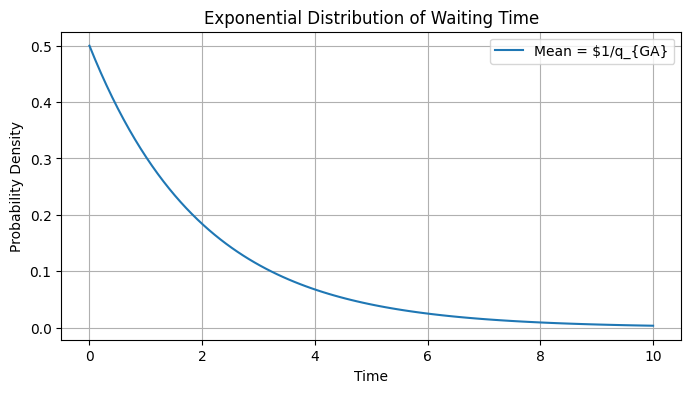

In [81]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters
q_GA = 0.5  # Example rate parameter for exponential distribution

# Values for the x-axis: 0 to 10 with 0.1 steps
x = np.linspace(0, 10, 100)
# Exponential distribution formula: f(x) = λ * exp(-λ * x)
y = q_GA * np.exp(-q_GA * x)

# Plotting the exponential distribution
plt.figure(figsize=(8, 4))
plt.plot(x, y, label=f'Mean = $1/q_{{GA}}')
plt.title('Exponential Distribution of Waiting Time')
plt.xlabel('Time')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()
